# State Farm Challenge

In this notebook, we will be analizing the datasets provided by State Farm, cleaning it, building a Logistic Regression, as well as a Random Forest Classifier. This notebook is structured as follows:

- Data Exploration
- Data Cleaning
- Exploratory Data Analysis
- Model building
    - Logistic Regression using Sklearn
        - Creating baseline model
        - Fine-tuning the model
    - Random Forest Classifier using Sklearn
        - Creating baseline model
        - Fine-tuning the model
- Model selection
    - Analyze models performances and parameters
    - Retrain the model on all the training data (training + validation)
    - Generate predictions on Test data

## Data Exploration

In [1]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
#Read in the train data
data = pd.read_csv('Data/exercise_40_train.csv')
data

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.593480,19.628352,Sun,0.794697,-0.825849,0.608774,-0.0085%,2.183834,3.202119,...,-1.640259,5.051545,no,5.798509,NaN,10.854903,9.505529,1,yes,98.855726
39996,0,1.708685,17.132638,Thursday,-2.676659,1.153851,0.465905,0.0077%,-0.048613,3.989567,...,-0.195783,2.020510,no,5.285345,-1.408117,8.867221,9.077493,0,yes,101.880335
39997,0,1.704132,17.824399,Monday,-0.581360,NaN,0.467339,-0.0216%,0.904643,2.975563,...,-0.071581,6.250353,no,4.729509,-1.118486,12.244620,7.663763,1,yes,100.022536
39998,0,3.963408,20.285597,Tuesday,0.430116,0.050189,1.821565,1e-04%,-0.401259,-0.247649,...,-1.248535,8.928009,no,6.803781,NaN,9.876172,8.644538,0,yes,109.460219


In [3]:
pd.set_option("max_rows", 100)
#Looking at the variables with missing values
data[data.columns[data.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x5      37572 non-null  float64
 1   x11     34890 non-null  float64
 2   x14     30136 non-null  float64
 3   x16     28788 non-null  float64
 4   x22     37613 non-null  float64
 5   x24     36144 non-null  object 
 6   x26     37567 non-null  float64
 7   x30     7664 non-null   float64
 8   x33     32829 non-null  object 
 9   x38     37598 non-null  float64
 10  x41     30497 non-null  float64
 11  x42     30271 non-null  float64
 12  x44     5753 non-null   float64
 13  x45     31991 non-null  float64
 14  x49     27177 non-null  float64
 15  x52     23818 non-null  float64
 16  x54     27272 non-null  float64
 17  x55     22304 non-null  float64
 18  x57     7536 non-null   float64
 19  x61     32707 non-null  float64
 20  x63     37580 non-null  float64
 21  x64     34899 non-null  float64
 22

In [4]:
#Loop to print the % of missing values 
missing_variable=list()
for column in data[data.columns[data.isnull().any()]].columns:
    
    if 100*data[column].isnull().sum()/len(data)>40:
        print(f"Variable {column} is missing {100*data[column].isnull().sum()/len(data)}% of values")
        
        missing_variable.append(column)


Variable x30 is missing 80.84% of values
Variable x44 is missing 85.6175% of values
Variable x52 is missing 40.455% of values
Variable x55 is missing 44.24% of values
Variable x57 is missing 81.16% of values


Here we can decide what to do with our missing values. Most variables are missing <40%, in fact, only 5 variables are missing more than 40% of their values. Variables `x30`, `x44`, and `x57` will be dropped, as the are missing over 80% of the values. Variables `x52`, and `x55` will be kept for now.

In [5]:
#Dropping features with more than 80% of missing values
data.drop(columns=['x30','x44','x57'], inplace=True)

In [6]:
data.select_dtypes('object')

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085%,$3750.51991954505,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077%,$448.867118077561,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216%,$834.95775080472,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1e-04%,$-48.1031003332715,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


Variable `x7` reflect percentage, `x19` reflects dollar amounts. These will be converted to numeric. `x39` reflects ranges and will be converted to a ordinal variable. The other variables will converted to categorical variables:

In [7]:
#Converting numeric values to float
#Because we are dealing with negative numbers that are present as strings, we'll need to use regular expressions to convert the dash ("-") to a negative sign ("\u2212").
import re 
data['X7']= [round(float(re.sub(u"\u2212", "-", i.strip('%'))),8) for i in data['x7']]
data['X19']= [round(float(re.sub(u"\u2212", "-", i.strip('$'))),10) for i in data['x19']]

In [8]:
#Converting ranges & categorical to catergories 

data = data.astype({'x39':'category','x24':'category','x31':'category','x3':'category','x33':'category','x60':'category','x65':'category','x77':'category','x93':'category','x99':'category'})

Let's check for input inconsistencies in the categorical data:

In [9]:
for column in data.select_dtypes('category').columns:
    #with pd.option_context('display.max_rows', None, 'display.width', None):  # more options can be specified also
    print(f'{column}: {data[column].unique().tolist()}')

x3: ['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday', 'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon']
x24: ['female', 'male', nan]
x31: ['no', 'yes']
x33: ['Colorado', 'Tennessee', 'Texas', 'Minnesota', 'New York', 'Florida', 'Nebraska', 'California', nan, 'North Dakota', 'Arizona', 'Alabama', 'Ohio', 'Pennsylvania', 'Iowa', 'Indiana', 'Vermont', 'Arkansas', 'Massachusetts', 'Illinois', 'Georgia', 'West Virginia', 'Connecticut', 'Virginia', 'North Carolina', 'Montana', 'New Mexico', 'New Hampshire', 'Michigan', 'DC', 'Washington', 'Louisiana', 'Kentucky', 'Utah', 'Missouri', 'Oregon', 'Oklahoma', 'Nevada', 'Wisconsin', 'New Jersey', 'Maryland', 'Maine', 'Alaska', 'Idaho', 'Wyoming', 'Rhode Island', 'South Dakota', 'Mississippi', 'Kansas', 'Delaware', 'Hawaii', 'South Carolina']
x39: ['5-10 miles']
x60: ['August', 'April', 'September', 'January', 'December', 'March', 'July', 'November', 'June', 'February', 'October', 'May']
x65: ['farmers', 'allstate', 'ge

From the above:
- `x3` has inconsistencies witn the input format. This can be easily fixed.
- `x33` has 52 unique values. One of them is NaN and the other is DC (District of Columbia).
- `x39` only has one value. Therefore, we can drop this variable.
- `x99` only has 'yes' values, beside 'NaN'. Since I have limited knowledge on what this data is about, I will assume that NaN values are, in fact, 'no' values.


In [10]:
data.drop(columns=['x39'], inplace=True)

In [11]:
#Addressing inconsistencies in x3
data.x3.replace({'Fri': 'Friday',
 'Mon': 'Monday',
 'Sat': 'Saturday',
 'Sun': 'Sunday',
 'Thur': 'Thursday',
 'Tue': 'Tuesday',
 'Wed': 'Wednesday'}, inplace=True)
data.x3.unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [12]:
#Addressing variable x99
data.x99 = data.x99.cat.add_categories(['no'])
data.x99.fillna('no', inplace=True)
data.x99.unique()

['yes', 'no']
Categories (2, object): ['yes', 'no']

Now let's check for duplicates:

In [13]:
#Checking for duplicated rows
data[data.duplicated()]

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x93,x94,x95,x96,x97,x98,x99,x100,X7,X19


# EDA

First, let's see how our data is balanced:

In [14]:
data.y.value_counts()

0    34197
1     5803
Name: y, dtype: int64

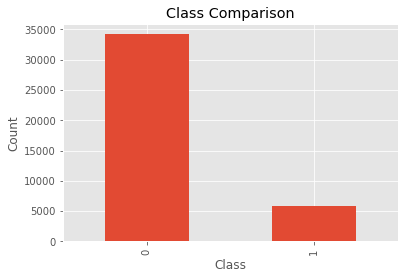

In [15]:
data.y.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Comparison')
plt.show()

Here we can see our dataset is highly imbalanced, with only 14.5% of the target variable as positive label. This is going to be very important when we are creating and evaluating our models. We can try resampling methods to balance the data and see if it makes a difference in our metrics. We should also keep this in mind when evaluating our thresholds.

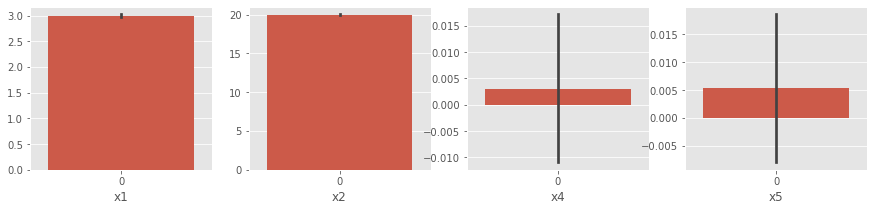

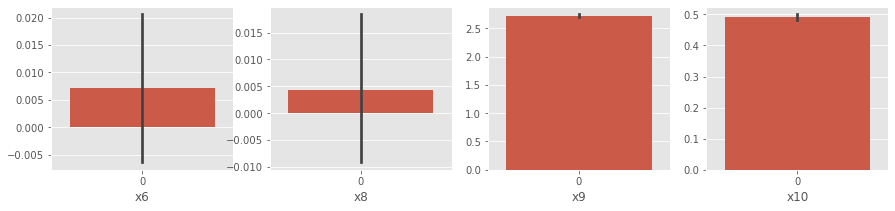

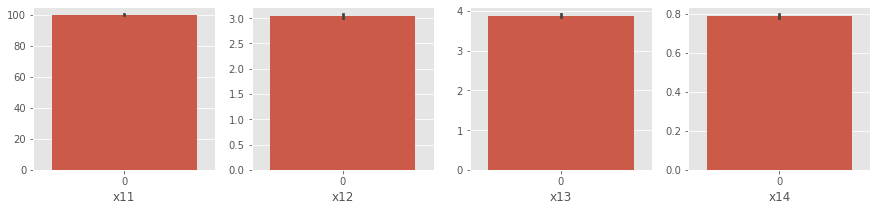

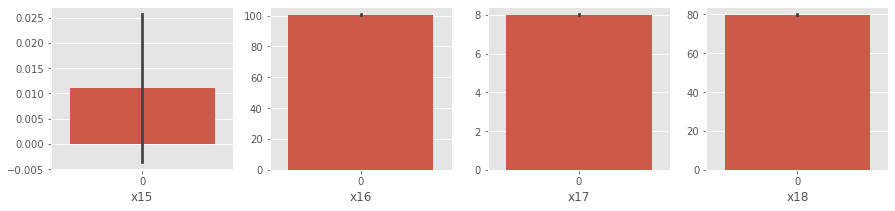

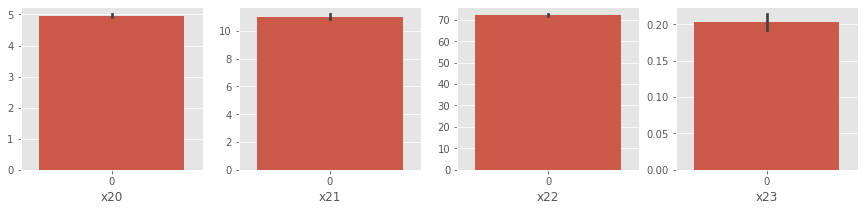

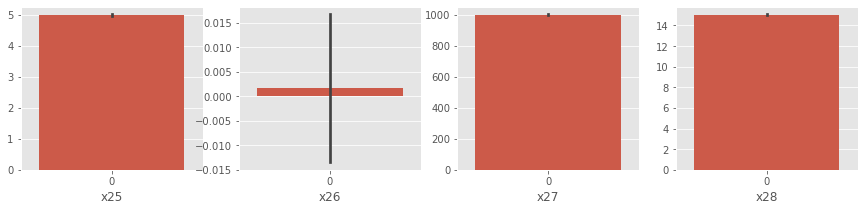

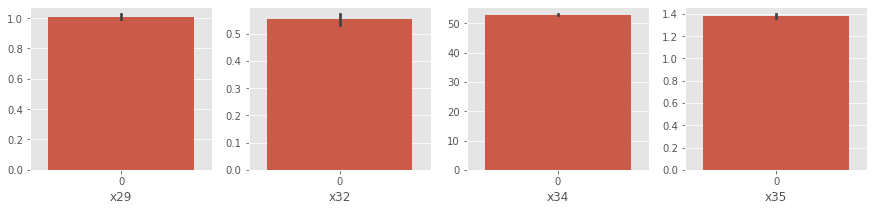

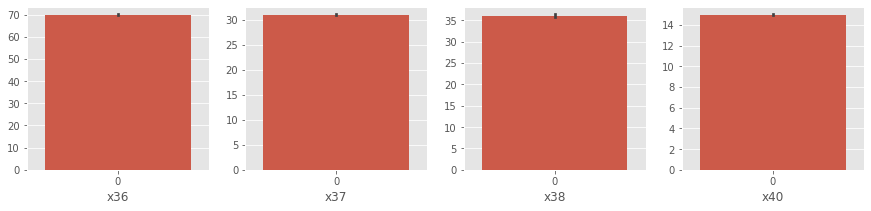

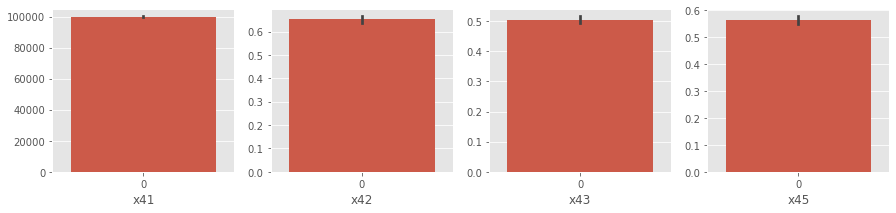

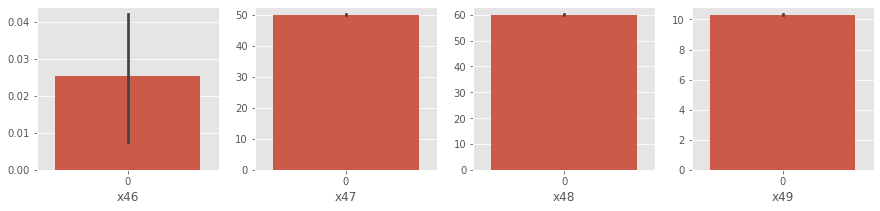

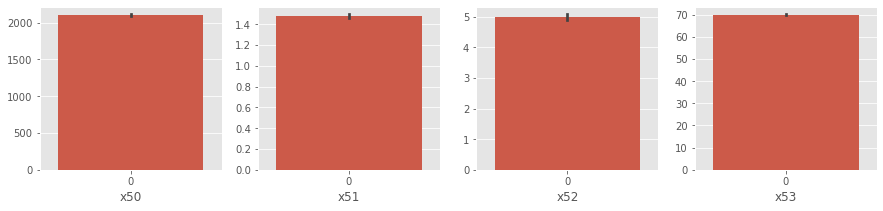

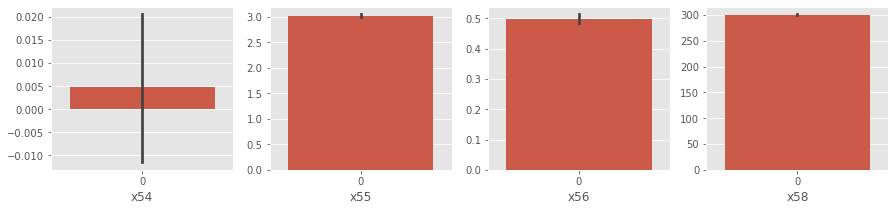

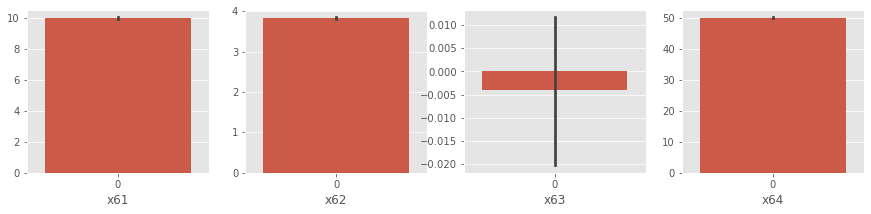

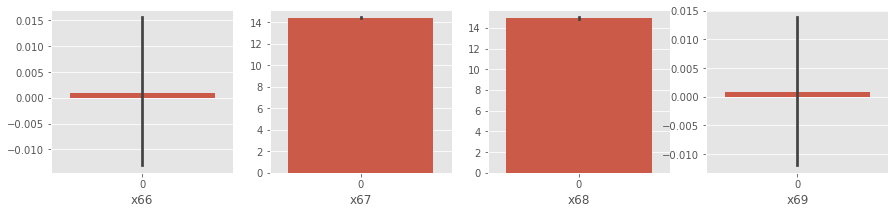

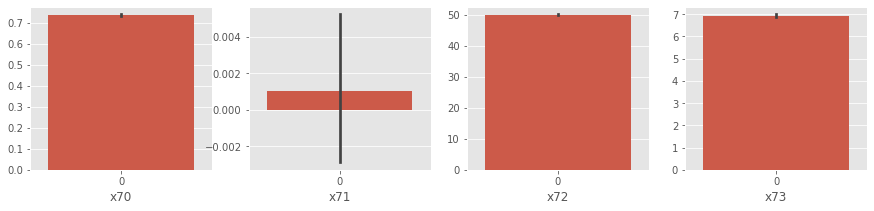

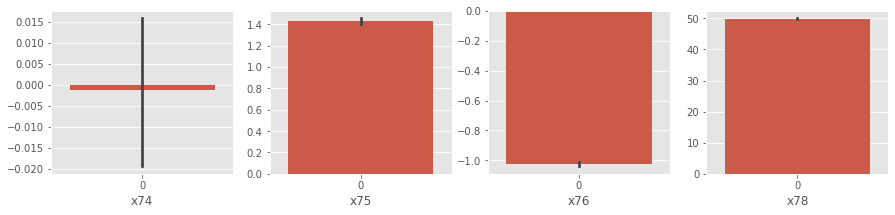

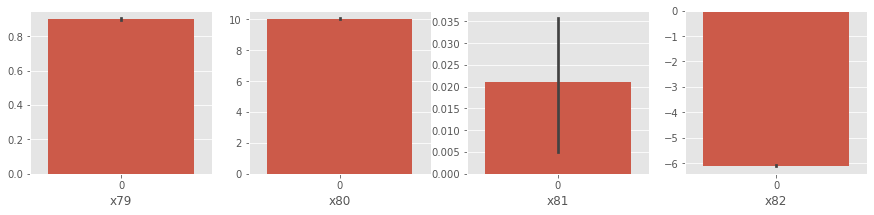

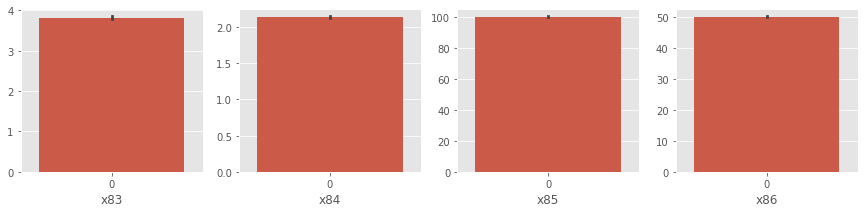

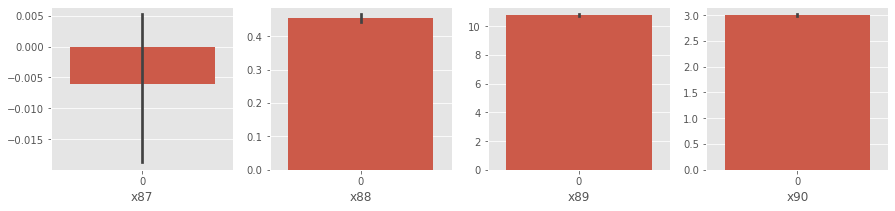

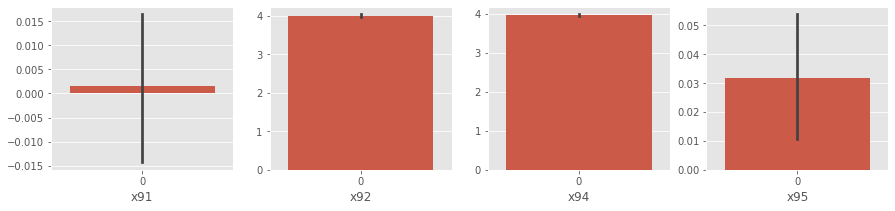

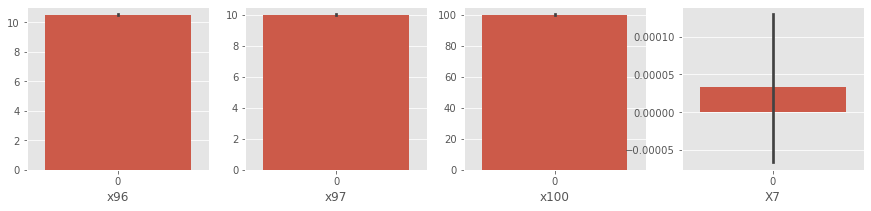

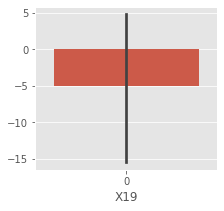

In [16]:
#Checking for outliers


fig = plt.figure(figsize=(15,3))

for plots, column in enumerate(data.select_dtypes(['float','int'])):

    if plots%4==0 and plots != 0:
        plt.show()
        fig = plt.figure(figsize=(15,3))

    fig.add_subplot(1,4,(plots%4)+1)
    sns.barplot(data=data[column])

    plt.xlabel(column)

No notable outliers.

Now the distributions:

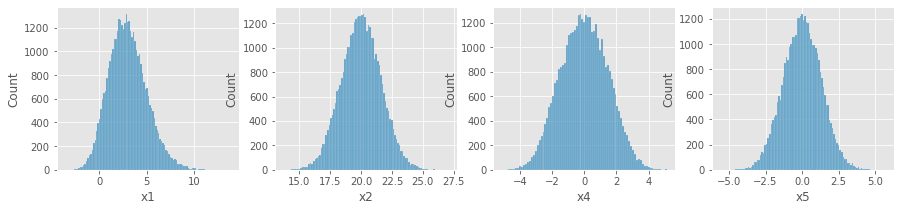

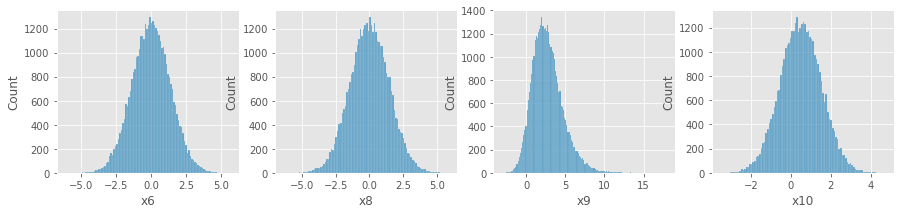

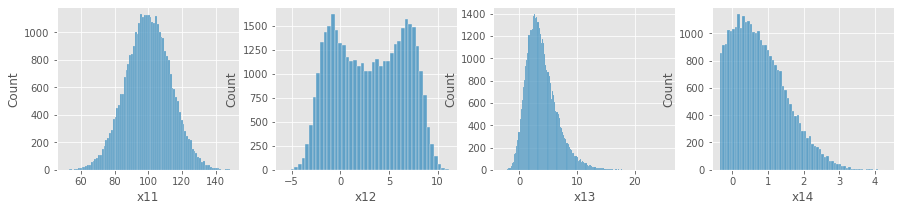

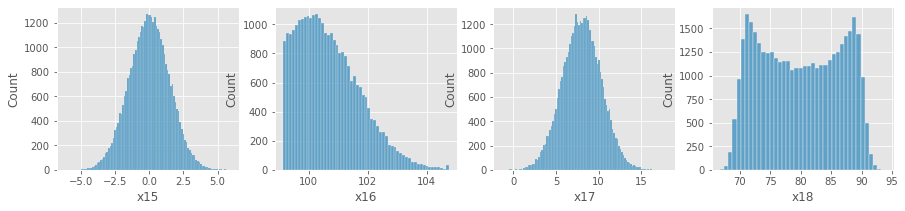

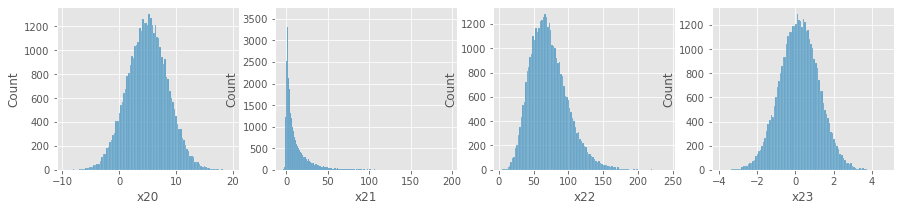

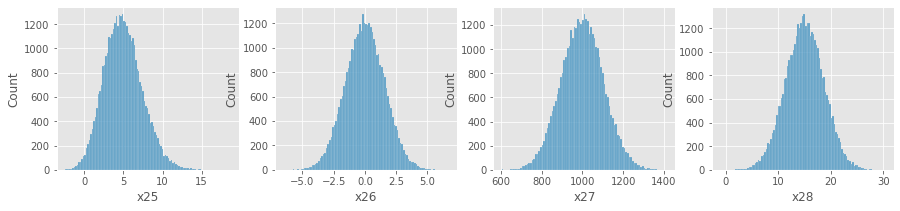

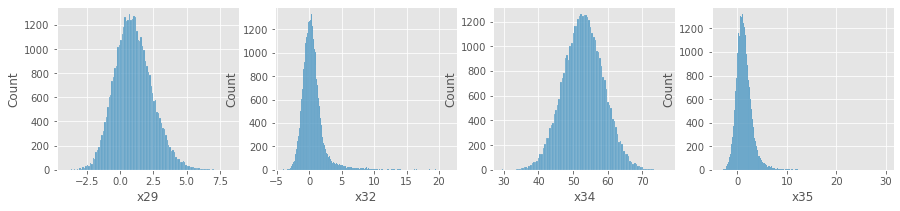

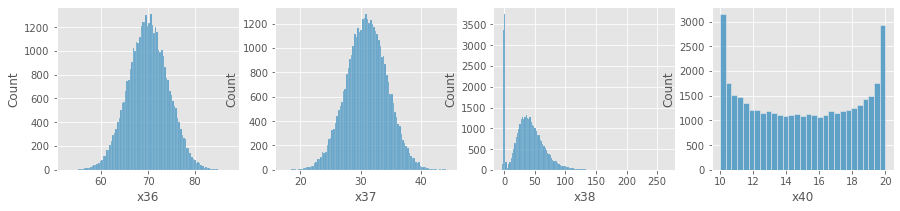

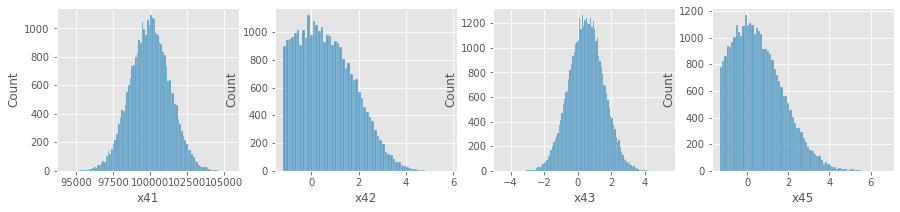

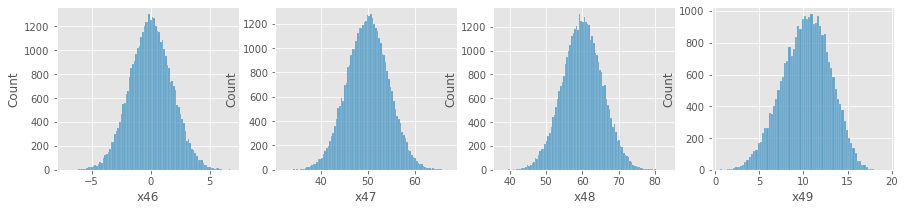

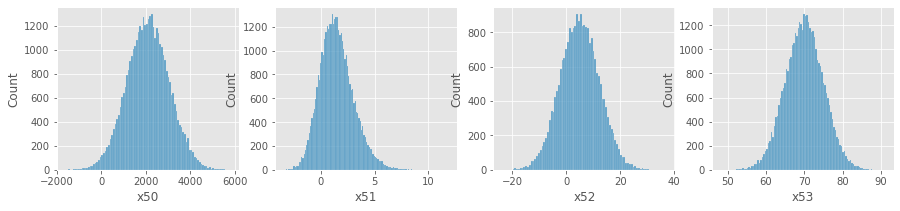

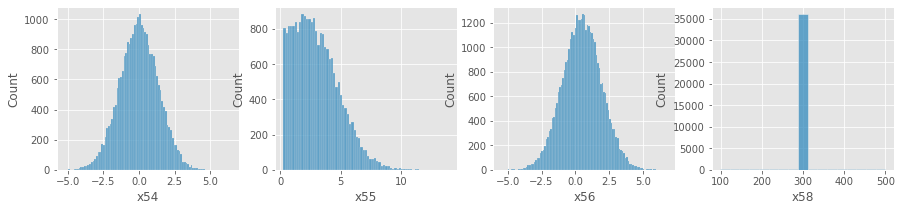

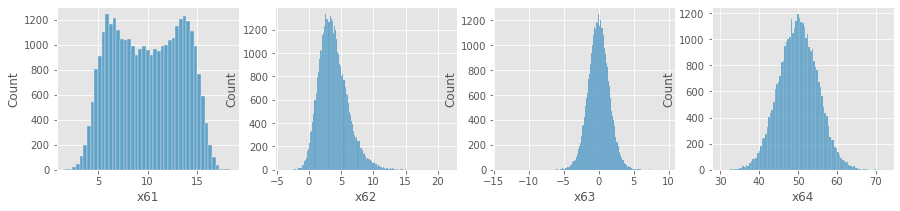

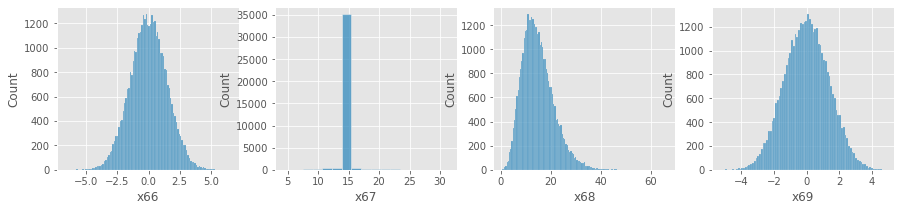

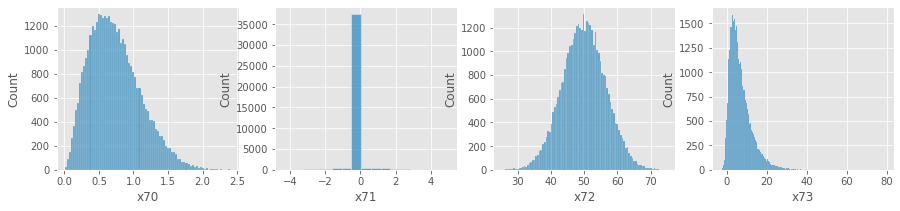

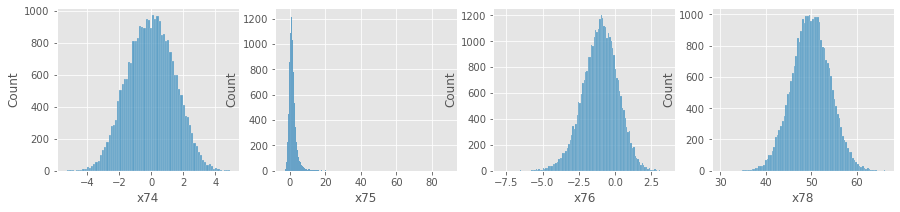

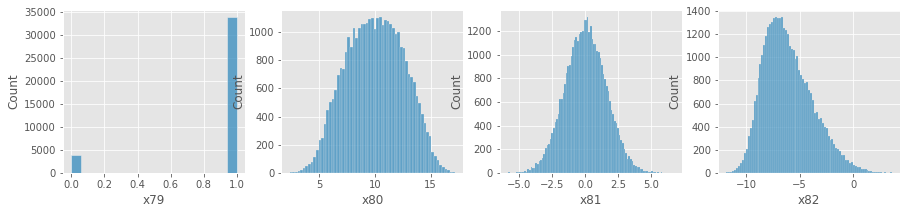

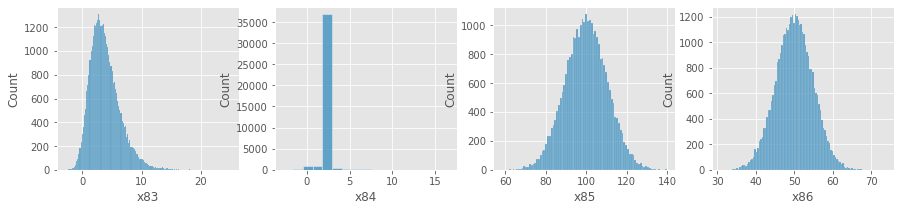

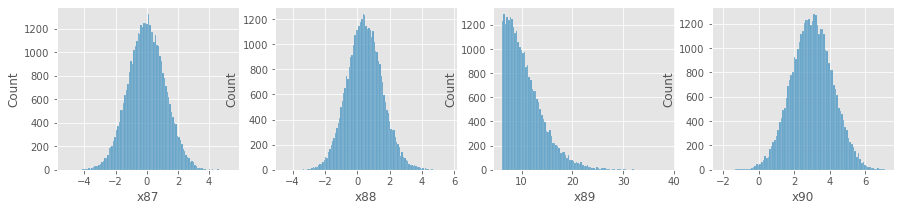

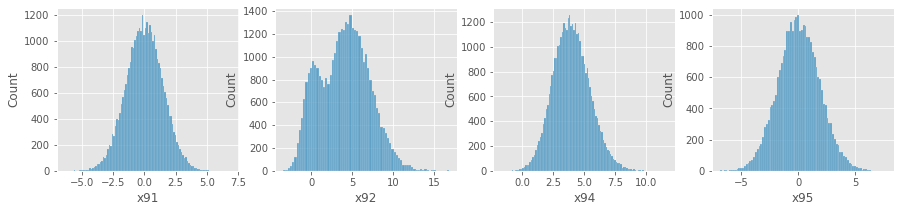

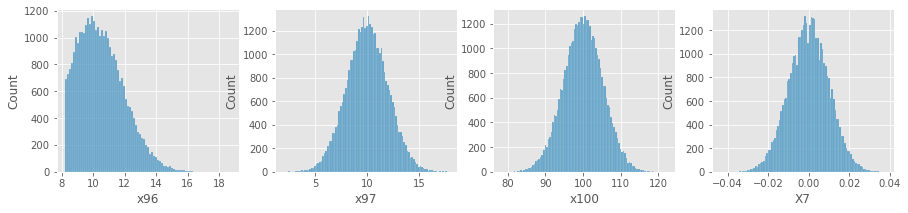

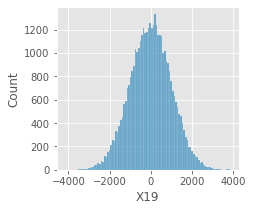

In [17]:
#Checking distributions

fig = plt.figure(figsize=(15,3))

for plots, column in enumerate(data.select_dtypes(['float','int'])):

    if plots%4==0 and plots != 0:
        plt.show()
        fig = plt.figure(figsize=(15,3))

    fig.add_subplot(1,4,(plots%4)+1)
    sns.histplot(data=data[column])

    plt.xlabel(column)

For the most part, the variables are normally distributed. Some are skewed and some are bimodal distributions. This should not affect our models.

Now let's see how our variables correlate to each other:

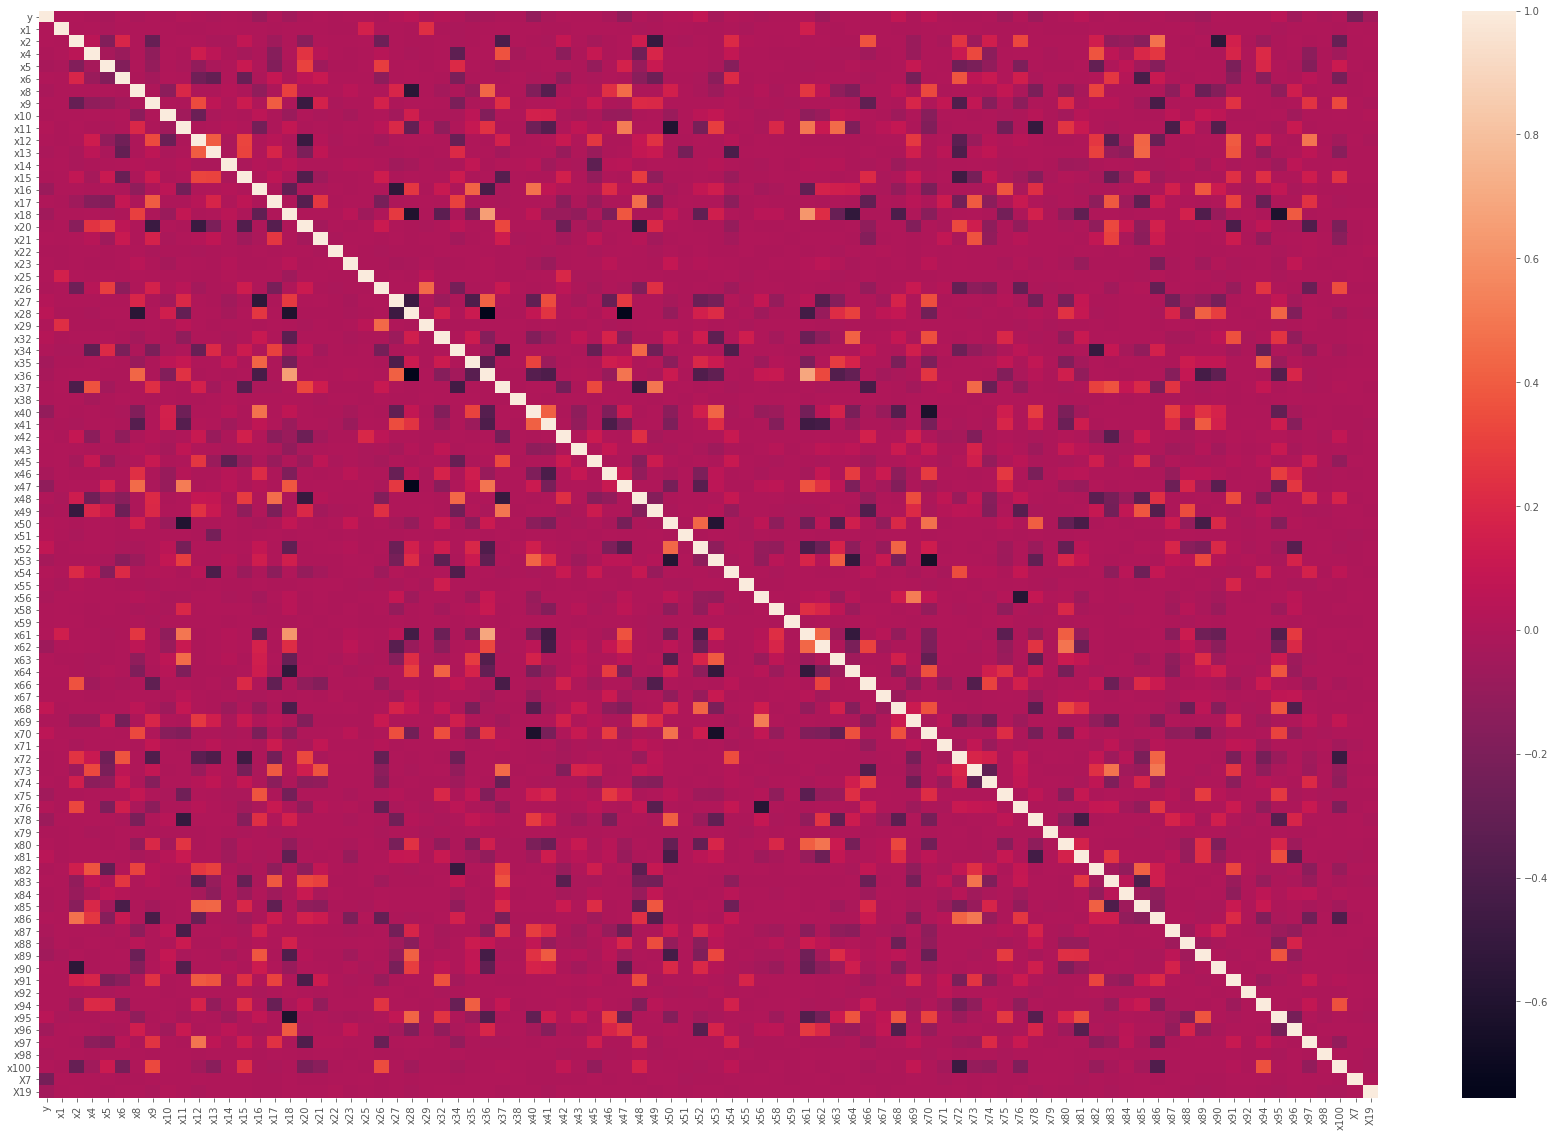

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr());

We can see some correlation amongst the dependant variables. This might affect out Logistic Regression model. We might use tools like SelectKBest, dimensionality reduction methods such as PCA, or simply try the features with the most importance as per the random forest model.

Now, let's create a pipeline fuction that allows us to run new data through to clean it and prepare it as we've prepared the training data:

In [19]:
#Function to fix the test data
def pipeline(data):
    #Dropping bad columns
    data.drop(columns=['x30','x44','x57','x39'], inplace=True)
    #Converting numeric values to float
    import re 
    data['X7']= [round(float(re.sub(u"\u2212", "-", i.strip('%'))),8) for i in data['x7']]
    data['X19']= [round(float(re.sub(u"\u2212", "-", i.strip('$'))),10) for i in data['x19']]
    #Converting categories
    data = data.astype({'x24':'category','x31':'category','x3':'category','x33':'category','x60':'category','x65':'category','x77':'category','x93':'category','x99':'category'})
    #Addressing inconsistencies in x3
    data.x3.replace({'Fri': 'Friday',
     'Mon': 'Monday',
     'Sat': 'Saturday',
     'Sun': 'Sunday',
     'Thur': 'Thursday',
     'Tue': 'Tuesday',
     'Wed': 'Wednesday'}, inplace=True)
    #Addressing variable x99
    data.x99 = data.x99.cat.add_categories(['no'])
    data.x99.fillna('no', inplace=True)
    df = pd.concat([data.select_dtypes(['number']),pd.get_dummies(data.select_dtypes(['category'])) ],axis=1)
    return df

# Modeling

For our models, we will try:
- LogisticRegression
- RandomForestClassifier

## LogisticRegression

First, let's get a baseline for our model. Let's run a model where we drop all the missing values from our data and see what out AUC looks like:

### Baseline model (No resampling)

In [20]:
df = pd.concat([data.select_dtypes(['number']),pd.get_dummies(data.select_dtypes(['category'])) ],axis=1)

In [21]:
df_drop_na = df.dropna(axis=1)
X = df_drop_na.drop(columns='y')
y = df_drop_na.y

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=40000).fit(X_train, y_train)

In [24]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.6809107560277954

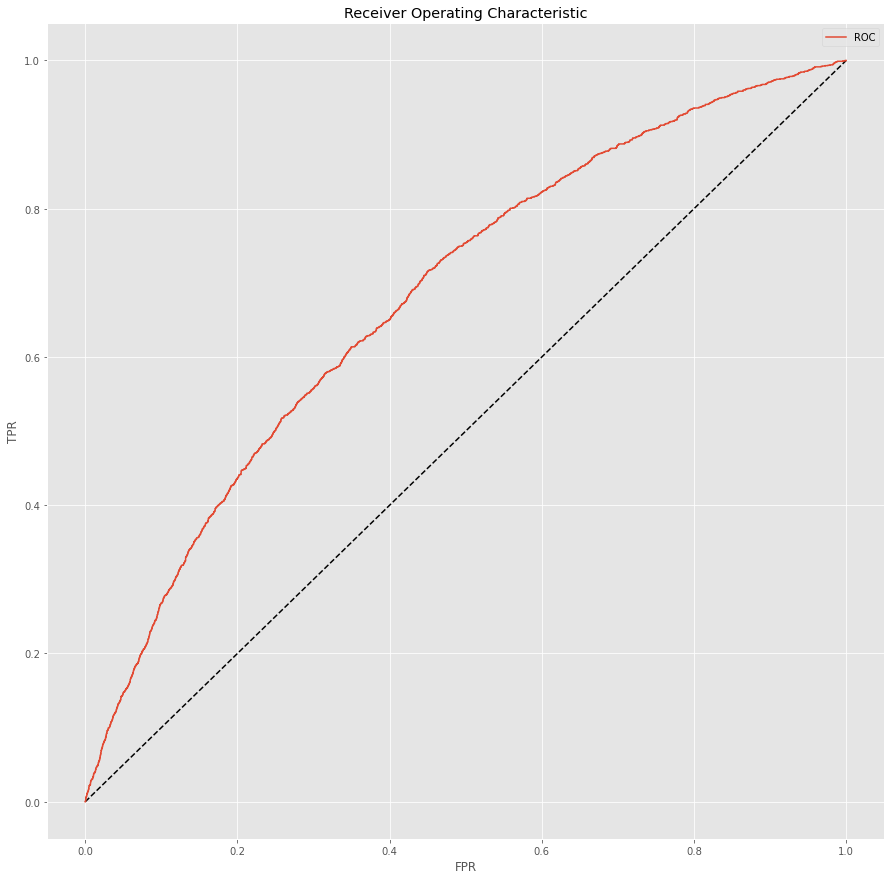

In [25]:
plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

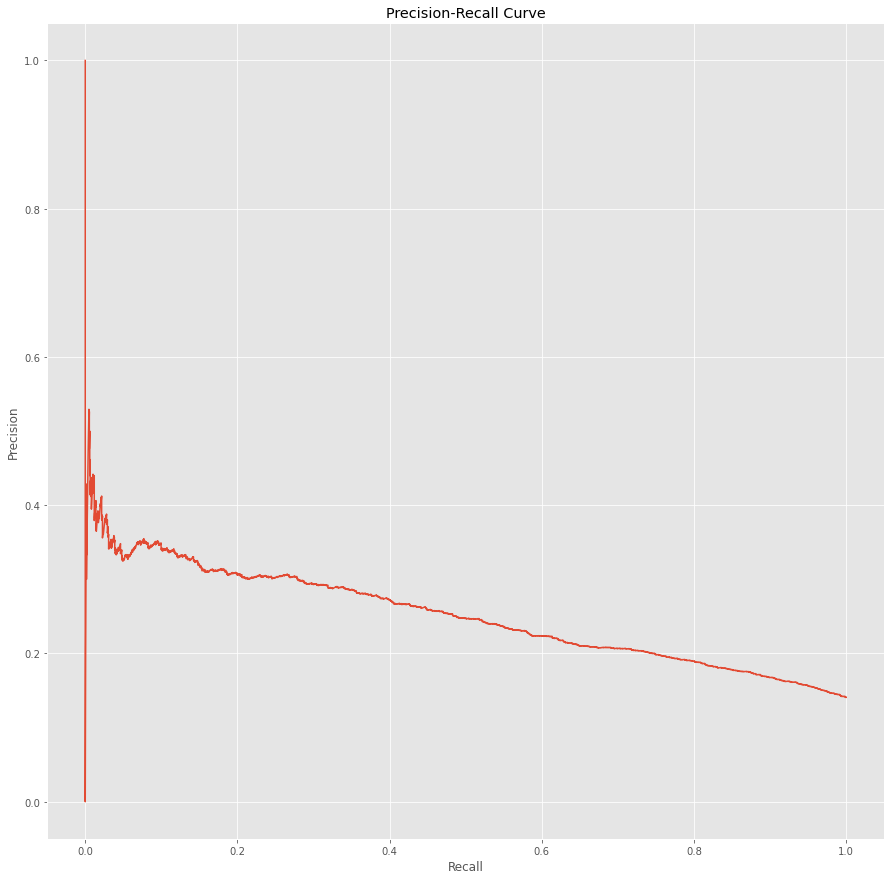

In [26]:
from sklearn.metrics import precision_recall_curve, accuracy_score
precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (15,15))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [27]:
accuracy_score(y_test, clf.predict(X_test))

0.8589393939393939

In [28]:
#Selecting best Threshold

def best_threshold(y_test,y_pred,precision, recall, threshold):
    from sklearn.metrics import accuracy_score
    accuracy_thresh = list()
    for thres in threshold:
        accuracy_thresh.append(accuracy_score(y_test, np.where(y_pred>thres,1,0), normalize = True))
    
    accuracy_thresh = pd.concat([pd.Series(threshold),pd.Series(precision), pd.Series(recall), pd.Series(accuracy_thresh)], axis = 1)
    accuracy_thresh.columns = ['threshold','precision','recall','accuracy']
    accuracy_thresh.sort_values(by='accuracy', ascending= False, inplace=True)
    return accuracy_thresh.head()

In [29]:
best_threshold(y_test,clf.predict_proba(X_test)[:,1],precision, recall, threshold)

,threshold,precision,recall,accuracy
13163,0.547127,0.500000,0.005388,0.859470
13165,0.551357,0.500000,0.004849,0.859470
13182,0.730329,0.000000,0.000000,0.859394
13166,0.556676,0.529412,0.004849,0.859394
13162,0.545705,0.476190,0.005388,0.859394


As we can see, our AUC score is 0.68 and our accuracy is 85.9% for a threshold of 0.5, however, for a threshold of 0.547127 we get an accuracy of 86%, but precision equal to 0.5 and recall equal to 0.005. This is our baseline.

### Baseline model (resampling)

For resampling we have several options. We can upsample the minority class, downsalmple the majority class, or use SMOTE (Synthetic Minority Oversampling Technique). For simplicity purposes, I will be using the upsample method, as I am not familiar with the data and a synthetic approach might add overlapping and noise.
- Note: This step is very crucial, as it could add data leakage. To prevent this, we will treat our validation set as we would our test data. This is only for modeling purposes, once the model is tuned, we will repeat this process with all our data (training + validation) to make used of all our labeled data.



In [30]:
from sklearn.utils import resample
#Join X_train and y_train
minority = pd.concat([X_train,y_train], axis=1)
# Upsample minority class
X_train_rs = resample(minority, replace=True, n_samples=int(minority[minority.y==0]['y'].value_counts()), random_state=42)
y_train_rs = X_train_rs.y
X_train_rs = X_train_rs.drop(columns='y')

AUC score: 0.6759488629109722
Accuracy: 0.8573484848484848


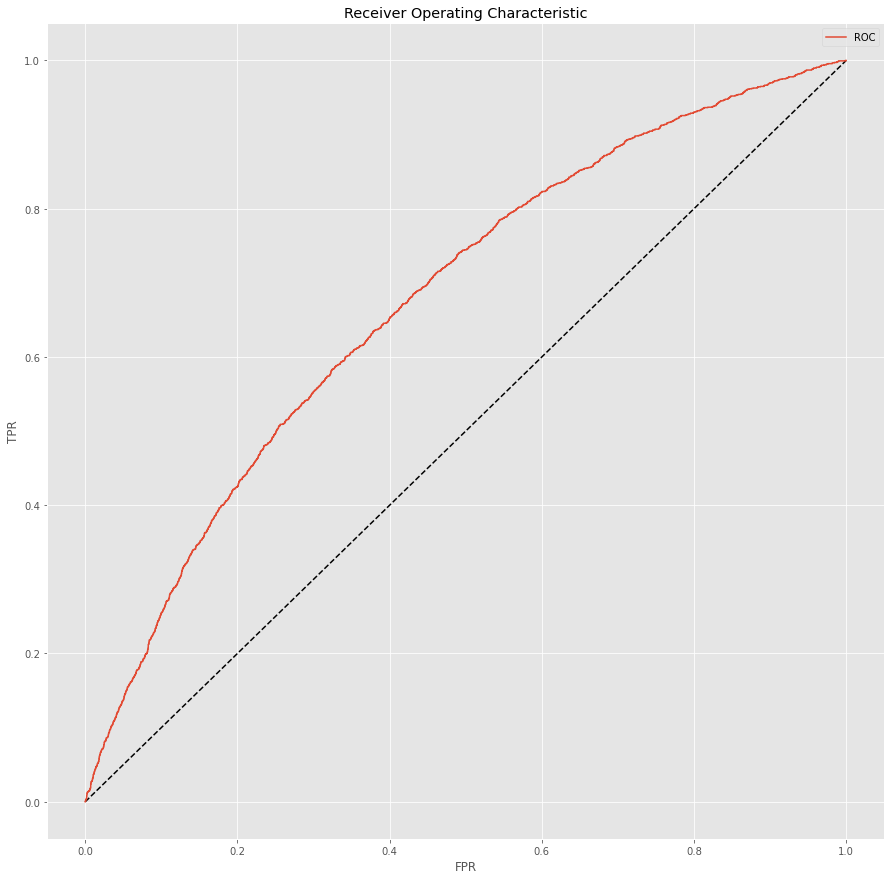

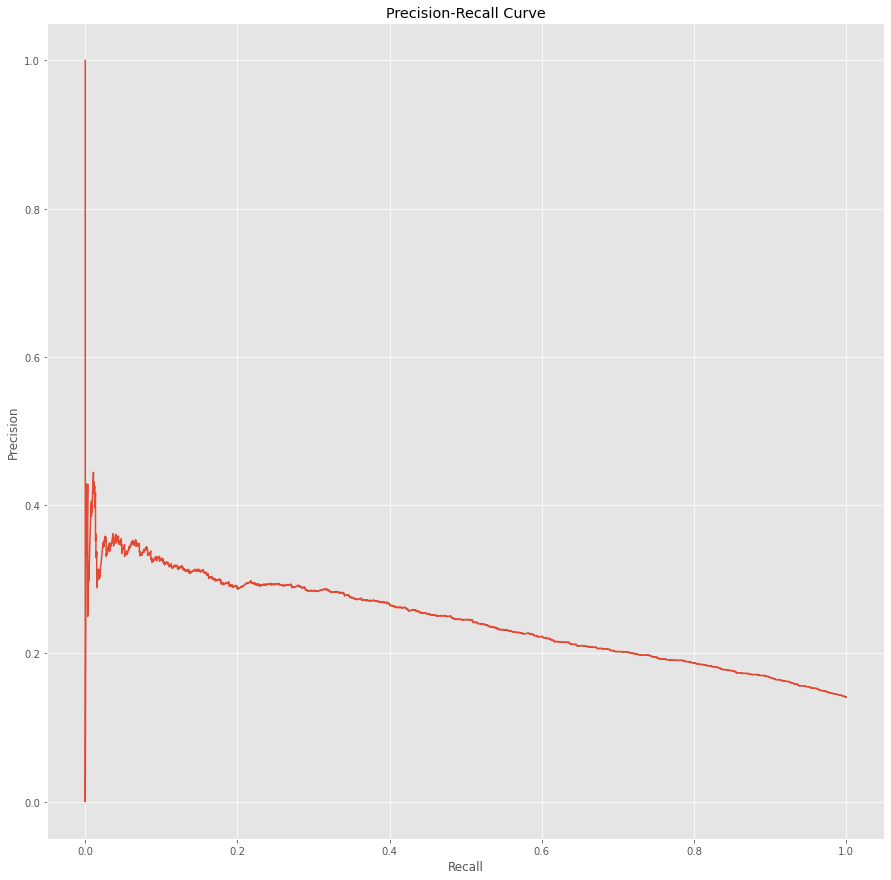

       threshold  precision    recall  accuracy
13186   0.754002      0.000  0.000000  0.859394
13185   0.709468      0.000  0.000000  0.859318
13179   0.622552      0.375  0.001616  0.859318
13172   0.590623      0.400  0.003233  0.859242
13184   0.661924      0.000  0.000000  0.859242


In [31]:
clf = LogisticRegression(random_state=42, max_iter=40000).fit(X_train_rs, y_train_rs)

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
print(f'AUC score: {metrics.auc(fpr, tpr)}\nAccuracy: {accuracy_score(y_test, clf.predict(X_test))}')

plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

precision, recall, threshold = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (15,15))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print(best_threshold(y_test,clf.predict_proba(X_test)[:,1],precision, recall, threshold))

Upsampling didn't improve our baseline model. It was worth to try.

Now, let's impute the missing values using KNearestNeighbors and scale our values using MinMaxScaler:



In [33]:
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_data = pd.concat([X_train,y_train], axis=1)

In [34]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(train_data)

KNNImputer()

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

anova_filter = SelectKBest(f_classif, k=100)

In [39]:
from sklearn.pipeline import make_pipeline
lr_pipe = make_pipeline(imputer, anova_filter, scaler, LogisticRegression(random_state=42,max_iter=40000, n_jobs=-1))

In [40]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('selectkbest', SelectKBest(k=100)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=40000, n_jobs=-1,
                                    random_state=42))])

In [41]:
y_proba = lr_pipe.predict_proba(X_test)
y_pred = lr_pipe.predict(X_test)

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1], pos_label=1)
print(f'AUC: {metrics.auc(fpr, tpr)}')

AUC: 0.7575060566728272


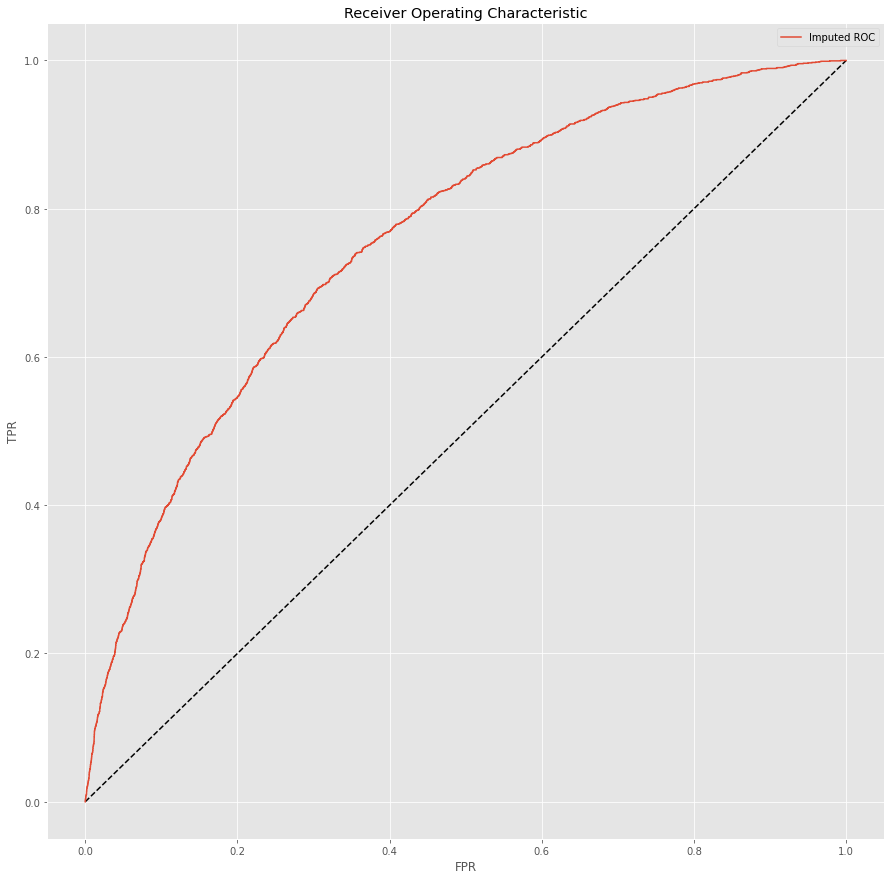

In [43]:
plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "Imputed ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

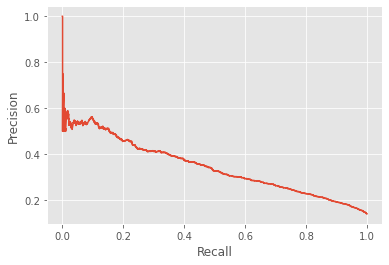

In [44]:
precision, recall, threshold = precision_recall_curve(y_test, y_proba[:,1])  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [45]:
accuracy_score(y_test, y_pred)

0.8622727272727273

In [46]:
best_threshold(y_test,y_proba[:,1],precision, recall, threshold)

,threshold,precision,recall,accuracy
12792,0.496432,0.560000,0.098060,0.862424
12798,0.497981,0.561129,0.096444,0.862424
12800,0.498205,0.561514,0.095905,0.862424
12790,0.495057,0.559633,0.098599,0.862424
12797,0.497735,0.559375,0.096444,0.862348


Our model had a significant improvement. It went from an AUC score of 0.68 to 0.76, and from an accuracy of 85.9% at a threshold of 0.5 to 86.2% at a threshold of 0.5. The best threshold was 0.547127 for 86% and precision & recallof 0.5 and recall equal to 0.005, respectively. Now the best threshold is 0.496432 for an accuracy of 86.2%, with precision and recall of 0.56 and 0.098, respectively.

## RandomForestClassifier

Now, let's dive into our second model. Here we will follow the same steps: drop missing values to find a baseline, then we impute missing values and compare.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_drop_na = df.dropna(axis=1)
X = df_drop_na.drop(columns='y')
y = df_drop_na.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_c = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_c.fit(X_train, y_train)
y_pred_c = rf_c.predict(X_test)

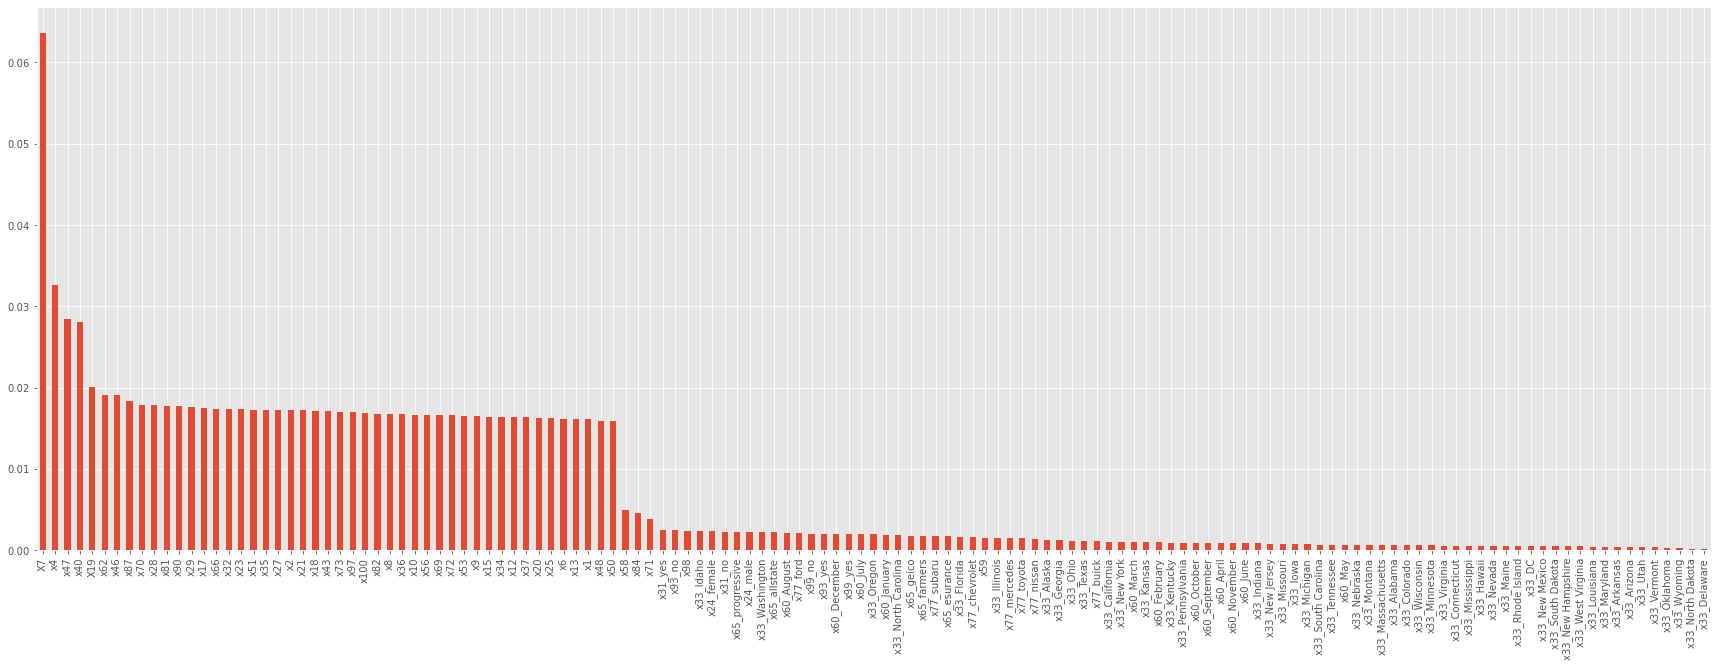

In [48]:
plt.figure(figsize=(30,10))
pd.Series(rf_c.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

In [49]:
score = classification_report(y_test, y_pred_c)
print(score)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     11344
           1       0.45      0.00      0.01      1856

    accuracy                           0.86     13200
   macro avg       0.65      0.50      0.47     13200
weighted avg       0.80      0.86      0.80     13200



AUC score: 0.7284975765709353
Accuracy: 0.8592424242424243


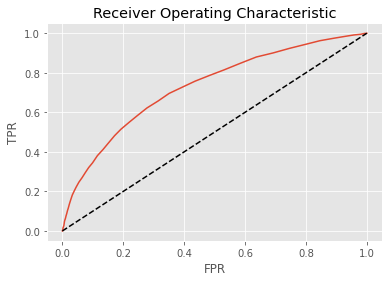

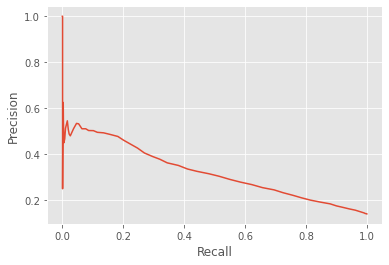

    threshold  precision    recall  accuracy
41       0.41   0.510730  0.064116  0.860303
42       0.42   0.532258  0.053341  0.860227
39       0.39   0.503145  0.086207  0.859848
40       0.40   0.510791  0.076509  0.859773
47       0.47   0.507042  0.019397  0.859773


In [50]:
fpr_rfc , tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, rf_c.predict_proba(X_test)[:,1],pos_label=1)

print(f'AUC score: {metrics.auc(fpr_rfc, tpr_rfc)}\nAccuracy: {accuracy_score(y_test, rf_c.predict(X_test))}')

plt.plot(fpr_rfc , tpr_rfc, label= "rf_c")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

precision, recall, threshold = precision_recall_curve(y_test, rf_c.predict_proba(X_test)[:,1])  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(best_threshold(y_test,rf_c.predict_proba(X_test)[:,1], precision, recall,threshold))

Right off the bat, the RandomForest model is very close to our LogisticRegression model with an accuracy of 86% for a threshold of 0.41, and precision & recall of 0.51 and 0.064 respectively.

Now, let's tune the model and see if it improves at all. After that, we will create a pipeline and run model again to see which of the three models is better:

In [51]:
from sklearn.model_selection import GridSearchCV
params_grid = {'bootstrap': [True, False],
               'max_depth': [10, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [5,50,100],
               'n_estimators': [100,1000]}
rf_grid_new = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_grid_new = GridSearchCV(rf_grid_new, params_grid, cv = 2, verbose=2, n_jobs = -1)

In [52]:
rf_grid_new.fit(X_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 50, 100],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [53]:
print(rf_grid_new.best_params_)
print(rf_grid_new.best_estimator_.score(X_test,y_test))
print(rf_grid_new.best_estimator_)

{'bootstrap': False, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 1000}
0.8593939393939394
RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=5,
                       n_estimators=1000, n_jobs=-1, random_state=42)


In [54]:
from sklearn.model_selection import cross_validate
rf_best_cv_results = cross_validate(rf_grid_new.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.85325722, 0.85335274, 0.85312885])

In [55]:
print(classification_report(y_test, rf_grid_new.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     11344
           1       0.50      0.00      0.01      1856

    accuracy                           0.86     13200
   macro avg       0.68      0.50      0.47     13200
weighted avg       0.81      0.86      0.80     13200



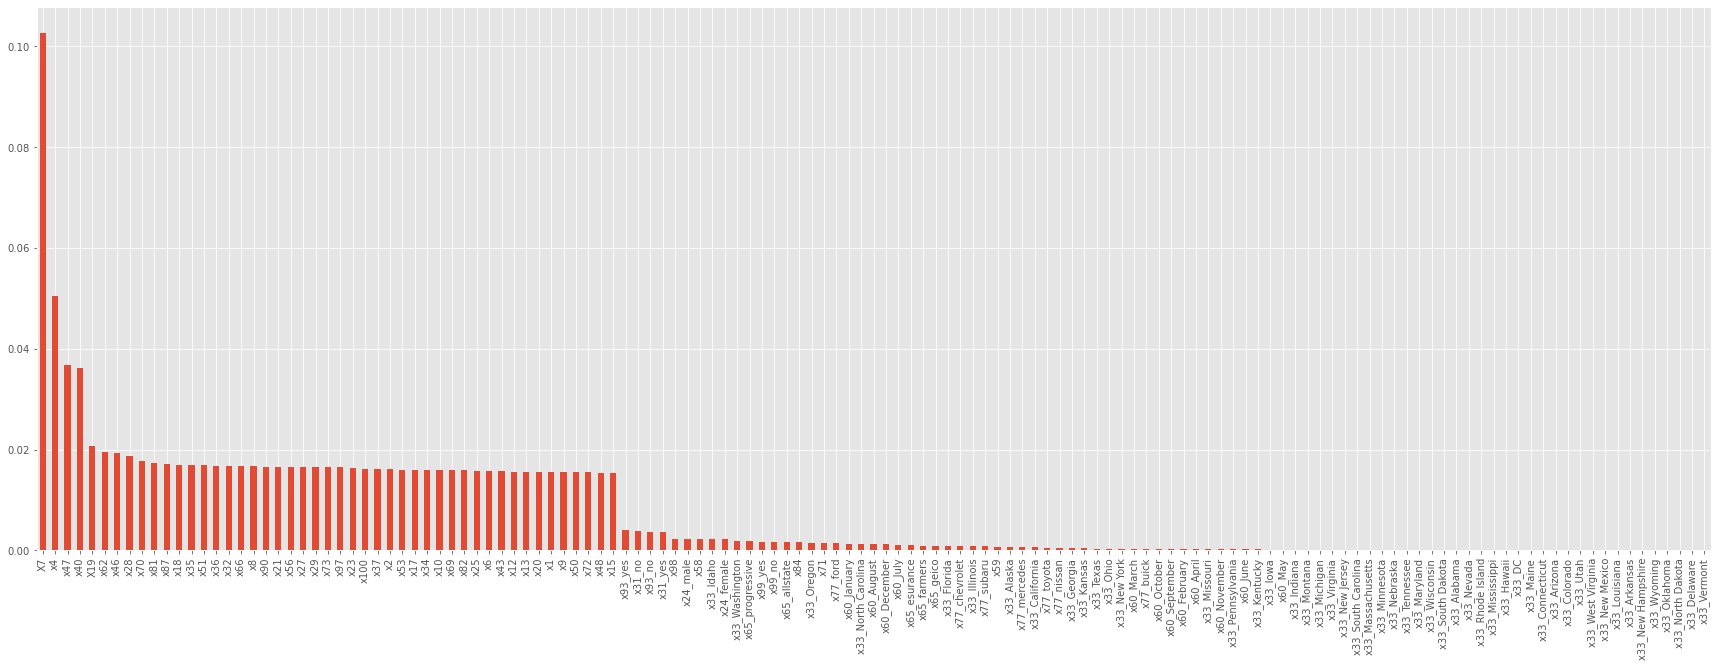

In [56]:
plt.figure(figsize=(30,10))
pd.Series(rf_grid_new.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

AUC score: 0.7606266775539857
Accuracy: 0.8593939393939394


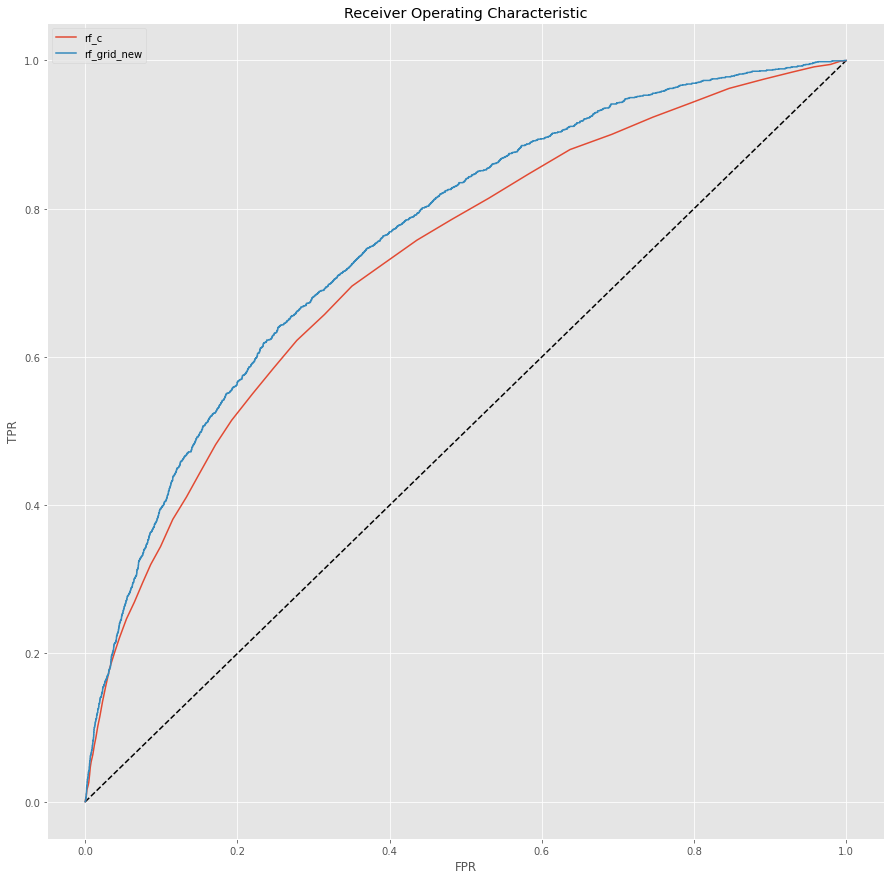

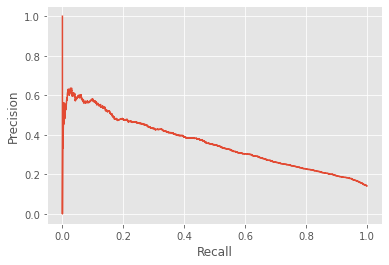

       threshold  precision    recall  accuracy
12844   0.371431   0.578125  0.099677  0.863258
12842   0.370989   0.577640  0.100216  0.863258
12848   0.371604   0.579114  0.098599  0.863258
12846   0.371546   0.578616  0.099138  0.863258
12849   0.371715   0.580952  0.098599  0.863182


In [57]:
fpr_rfc , tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, rf_c.predict_proba(X_test)[:,1],pos_label=1)

fpr_rfgrid , tpr_rfgrid, thresholds_rfgrid = metrics.roc_curve(y_test, rf_grid_new.predict_proba(X_test)[:,1],pos_label=1)

print(f'AUC score: {metrics.auc(fpr_rfgrid, tpr_rfgrid)}\nAccuracy: {accuracy_score(y_test, rf_grid_new.predict(X_test))}')

plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_rfc , tpr_rfc, label= "rf_c")
plt.plot(fpr_rfgrid , tpr_rfgrid, label= "rf_grid_new")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

precision, recall, threshold = precision_recall_curve(y_test, rf_grid_new.predict_proba(X_test)[:,1])  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(best_threshold(y_test,rf_grid_new.predict_proba(X_test)[:,1], precision, recall,threshold))

Our RandomForestClassifier with parameters: `{'bootstrap': False, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 1000}` improved significantly over our baseline model. But we did drop the missing values, so let's create a pipeline, similar to the one we used for the LogisticRegression model and apply it to our RandomForest model

In [58]:
rf_pipe = make_pipeline(imputer,RandomForestClassifier(bootstrap = False, max_depth = 100, max_features = 'auto', min_samples_leaf = 5, n_estimators = 1000, n_jobs =-1))

In [59]:
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=100,
                                        min_samples_leaf=5, n_estimators=1000,
                                        n_jobs=-1))])

AUC: 0.7618892601587958


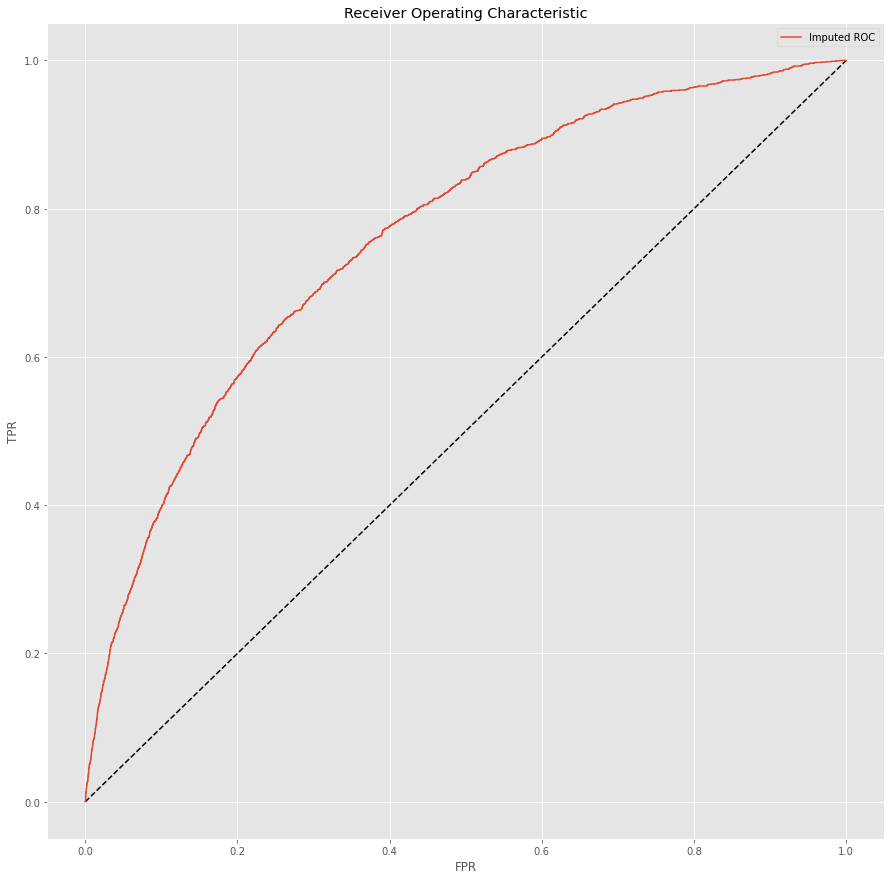

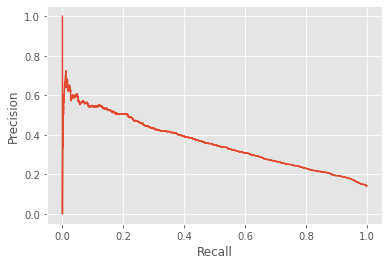

       threshold  precision    recall  accuracy
12691   0.348633   0.550369  0.120690  0.862576
12689   0.348518   0.550122  0.121228  0.862576
12679   0.347138   0.548926  0.123922  0.862576
12678   0.346857   0.547619  0.123922  0.862500
12672   0.346375   0.546948  0.125539  0.862500


In [60]:
rf_proba = rf_pipe.predict_proba(X_test)
rf_pred = rf_pipe.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_proba[:,1], pos_label=1)
print(f'AUC: {metrics.auc(fpr, tpr)}')

plt.figure(figsize = (15,15))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "Imputed ROC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

precision, recall, threshold = precision_recall_curve(y_test, rf_proba[:,1])  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

print(best_threshold(y_test,rf_proba[:,1],precision, recall, threshold))

## Model Selection

At last, we are ready to select our models. Based on all the scores, the best model for each type will be those in our pipelines (`lr_pipe` and `rf_pipe`).
### Re-training models
Now, as mentioned at the begining, we will now use all our data (training + validation) to re-train these models, keeping in mind we should do the same with the imputer:

In [61]:
imputer.fit(df)
scaler.fit(df.drop(columns='y'))
anova_filter = SelectKBest(f_classif, k=100)
lr_final = make_pipeline(imputer, anova_filter, scaler, LogisticRegression(random_state=42,max_iter=40000, n_jobs=-1))

In [62]:
rf_final = make_pipeline(imputer,RandomForestClassifier(bootstrap = False, max_depth = 100, max_features = 'auto', min_samples_leaf = 5, n_estimators = 1000, n_jobs =-1))

In [63]:
lr_final.fit(df.drop(columns='y'), df.y)
rf_final.fit(df.drop(columns='y'), df.y)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=100,
                                        min_samples_leaf=5, n_estimators=1000,
                                        n_jobs=-1))])

### Generate predictions on Test data

In [64]:
test_data = pd.read_csv('Data/exercise_40_test.csv')
test_data = pipeline(test_data)

In [65]:
glmresults = lr_final.predict_proba(test_data)[:,1]

In [66]:
pd.DataFrame(glmresults).to_csv('glmresults.csv',header=False, index=False)

In [67]:
nonglmresults = rf_final.predict_proba(test_data)[:,1]

In [68]:
pd.DataFrame(nonglmresults).to_csv('nonglmresult.csv',header=False, index=False)

# Conclusions

- We were able to improve the models' AUC score from as low as 0.67, to 0.76. 
- We were also able to select the best threshold for each model based on accuracy. It is important to note that, with highly imbalanced datasets, it is better to use precision and recall to determine the threshold at which the model performs at its best based on the business case goad.
- For these models, we are using data we do not fully understand. Therefore, we used accuracy as our main metric to determine model performance. In a real-world scenario, I would want to understand the business goal of the model to select more adequate metrics. Precision/Recall are usually better, depending on the use case. For example: If this model was to be used to determined best candidates for email ads, then I'd say we'd want a higher Recall, given that this ad campaign would not cost too much money, and if we have false positives, it wouldn't really matter. On the other hand, if the ad campaign was more expensive, then we'd want more True Positives, therefore, Precision would be a better metric. After knowing the use case, a threshold for the best result can be selected.
- Our EDA was very basic, we only checked for outliers and distributions. This was mostly due to not knowing what the variables represented. Some variables contained state names, car brans, sex, day of the week and month. A comparation could have been made to understand which cars tend to be insured in what state and whether it was a woman or a man. Knowing the other variables would have allowed for much deeper analysis of the data.
- Other than creating dummy variables for categories, Feature Engineering was not performed for the same reasons stated above.
- It is important to keep in mind that these models are far from perfect. Good models are the result of constant improvement, and this is just the baseline for future research.

# Future Research

- Imputing our missing data gave us a significant increase in our AUC scores, trying a SMOTE method might better the scores even further.
- We tried different approaches, and we also cut corners. We upsampled our data after dropping the missing values. Trying to upsample, or SMOTE, after imputing might give us better results. 
- Applying GridSearchCV with different number of neighbors for the imputer, as well as different K values for SelectKBest, might improve the LogisticRegression model as well as the RandomForestClassifier. And then, running another GridSearchCV to make sure the imputed data didn't significantly change the model and its optimal parameters.
